In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np
import pandas as pd
import ast
import glob
import functools

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

import importlib
import sys
sys.path.append("/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf);

import project as project
importlib.reload(project);

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
data_dir = '/Users/jakubkusmierski/Desktop/Uczenie_Maszynowe_2/data/sieci/'
csv_files = glob.glob(data_dir + "Higgs*.csv")

In [3]:
dfs = []

for file in csv_files:
    df = pd.read_csv(file)

    for col in ['tau.pt', 'tau.eta', 'tau.phi', 'H.pt', 'H.eta', 'H.phi']:
        df[col] = df[col].apply(ast.literal_eval)

    
    df['tau1_pt'] = df['tau.pt'].apply(lambda x: x[0])
    df['tau2_pt'] = df['tau.pt'].apply(lambda x: x[1])
    df['tau1_eta'] = df['tau.eta'].apply(lambda x: x[0])
    df['tau2_eta'] = df['tau.eta'].apply(lambda x: x[1])
    df['tau1_phi'] = df['tau.phi'].apply(lambda x: x[0])
    df['tau2_phi'] = df['tau.phi'].apply(lambda x: x[1])
    df['H_pt'] = df['H.pt'].apply(lambda x: x[0])
    df['H_eta'] = df['H.eta'].apply(lambda x: x[0])
    df['H_phi'] = df['H.phi'].apply(lambda x: x[0])

    df.drop(columns=['tau.pt', 'tau.eta', 'tau.phi', 'H.pt', 'H.eta', 'H.phi'], inplace=True)

    dfs.append(df)

In [4]:
df = pd.concat(dfs, ignore_index=True)
df.head()

,H.m,H.E,t1.m,t1.E,t2.m,t2.E,METx,METy,trueMETx,trueMETy,...,type2,tau1_pt,tau2_pt,tau1_eta,tau2_eta,tau1_phi,tau2_phi,H_pt,H_eta,H_phi
0,196.73200,282.94920,1.77682,184.299360,1.77682,98.64985,-50.879560,-7.675525,-52.073196,-13.297127,...,-1,76.953780,98.63361,1.519704,-0.002149,-2.765061,1.797632,115.700005,1.164141,2.515362
1,170.96394,454.64020,1.77682,127.403140,1.77682,327.23706,236.432200,-97.585000,246.659970,-110.700200,...,-1,124.511536,228.12059,0.214641,0.901347,-0.984634,-0.233547,330.250270,0.726369,-0.493766
2,403.04907,770.57380,1.77682,453.754670,1.77682,316.81910,18.701082,-1.000554,14.325636,21.218117,...,-1,90.911680,252.49693,-2.290618,-0.699414,-2.556309,0.778071,164.195970,-2.063401,0.884353
3,218.99274,233.65942,1.77682,108.677956,1.77682,124.98147,-43.222538,-18.162619,-33.788174,-6.049116,...,-1,102.301540,117.20386,-0.350866,-0.362030,0.301128,-2.878016,15.459115,-2.346176,-3.129083
4,234.15674,251.93723,1.77682,99.779755,1.77682,152.15747,104.295290,-8.689900,90.916330,-2.842107,...,-1,76.937290,137.41629,0.752438,-0.458990,2.402238,-0.038647,92.950200,-0.019375,0.524304


In [5]:
print(colored("Columns in the dataset:\n", 'green'), df.columns.values)
print(colored("Shape of the dataset:\n", 'red'), df.shape)

Columns in the dataset:
 ['H.m' 'H.E' 't1.m' 't1.E' 't2.m' 't2.E' 'METx' 'METy' 'trueMETx'
 'trueMETy' 'dm1' 'pt1' 'eta1' 'phi1' 'mass1' 'type1' 'dm2' 'pt2' 'eta2'
 'phi2' 'mass2' 'type2' 'tau1_pt' 'tau2_pt' 'tau1_eta' 'tau2_eta'
 'tau1_phi' 'tau2_phi' 'H_pt' 'H_eta' 'H_phi']
Shape of the dataset:
 (35586, 31)


In [6]:
input_features = [
    'dm1', 'pt1', 'eta1', 'phi1', 'mass1',
    'dm2', 'pt2', 'eta2', 'phi2', 'mass2',
    'trueMETx', 'trueMETy'
]

output_targets = [
    'H.m', 'H_pt', 'H_eta', 'H_phi',
    't1.m', 'tau1_pt', 'tau1_eta', 'tau1_phi',
    't2.m', 'tau2_pt', 'tau2_eta', 'tau2_phi'
]


output_targets = ['H.m', 'H_pt','tau1_pt','tau2_pt']


#output_targets = ['H.m', 'H_pt']

In [7]:
features = df[input_features].astype('float32').values
labels = df[output_targets].astype('float32').values

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((features, labels))

print(colored("Dataset:\n", 'blue'), dataset)
print(colored("Dataset length:\n", 'green'), len(features))

Dataset:
 <_TensorSliceDataset element_spec=(TensorSpec(shape=(12,), dtype=tf.float32, name=None), TensorSpec(shape=(4,), dtype=tf.float32, name=None))>
Dataset length:
 35586


I0000 00:00:1749807234.728557 19593749 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1749807234.728578 19593749 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
nStepsPerEpoch = project.nStepsPerEpoch
batchSize = project.batchSize
output_shape = len(output_targets)
buffor_size = project.buffor_size

minval = 5.0
maxval = 55.0
mean = 0.0
stddev = 1.0
rho_min = -1.0
rho_max = 1.0

adding_smeard_MET = functools.partial(project.add_smeared_MET, minval=minval, maxval=maxval, mean=mean, stddev=stddev, rho_min=rho_min, rho_max=rho_max)

dataset_train_preaper = dataset.batch(batchSize).map(adding_smeard_MET).take(nStepsPerEpoch).cache()

item = next(iter(dataset_train_preaper))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (128, 17)
Labels shape: (128, 4)


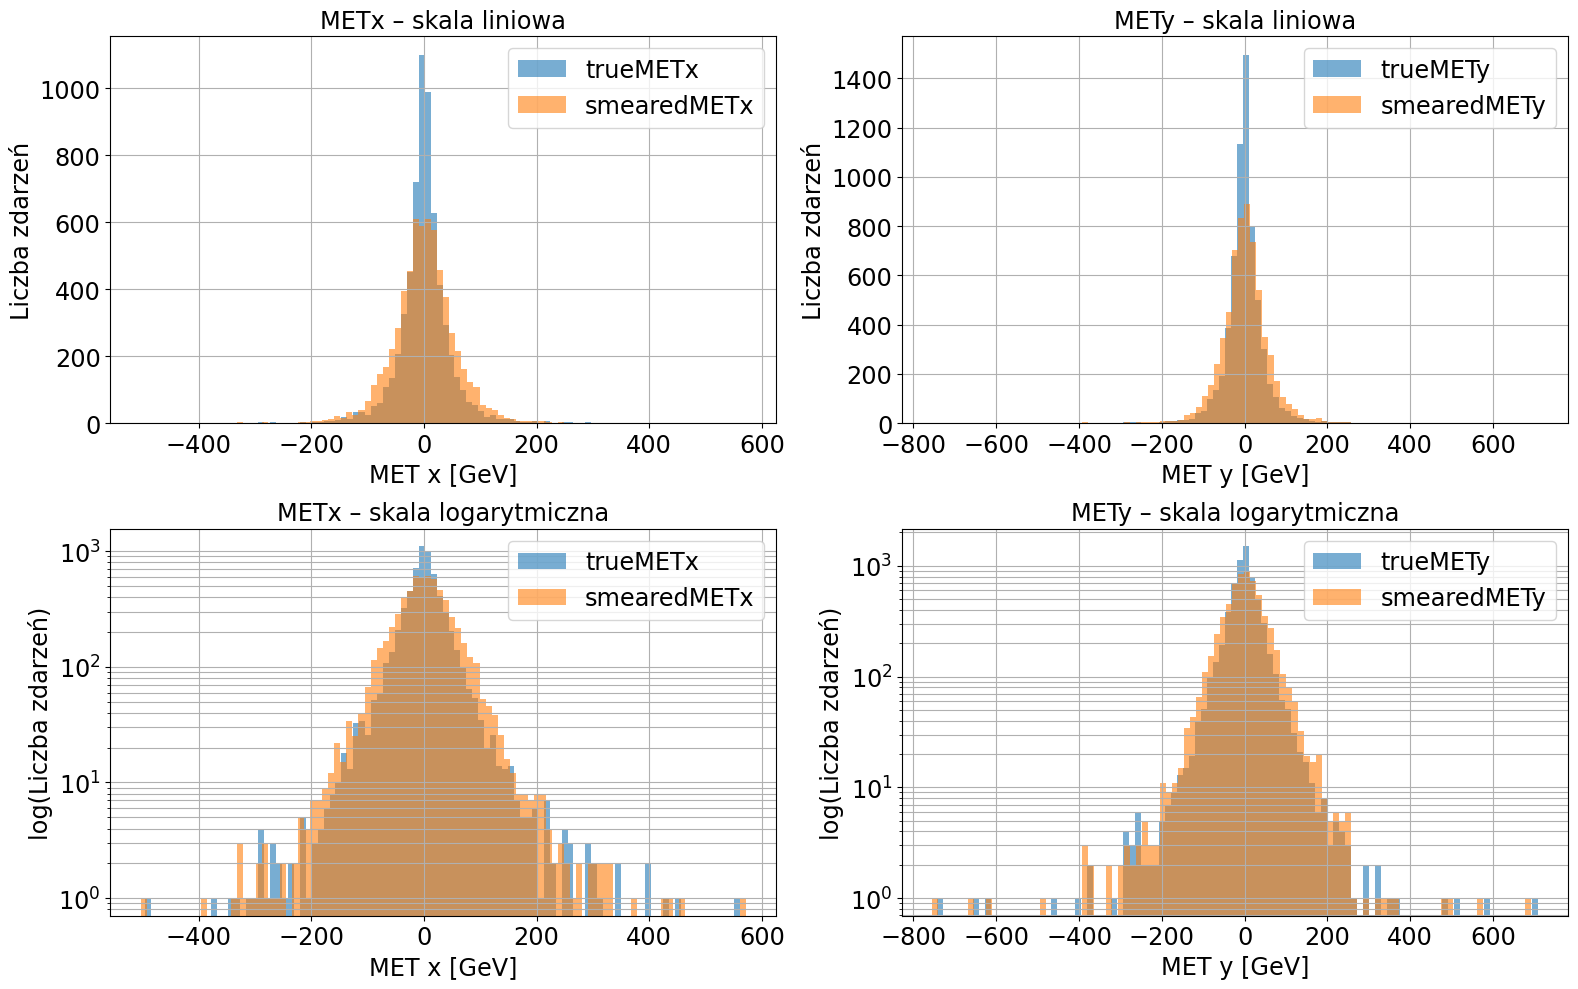

In [10]:
project.plot_MET(dataset_train_preaper)

In [11]:
dataset_train = dataset_train_preaper.map(project.remove_true_MET).cache()

item = next(iter(dataset_train))
print(colored("Features shape:", "blue"), item[0].shape)
print(colored("Labels shape:", "blue"), item[1].shape)

Features shape: (128, 15)
Labels shape: (128, 4)


## Model FCNN

In [12]:
model_fc = tf.keras.Sequential(layers=[
    tf.keras.Input(shape=(15,), name="model_input"),
    
    tf.keras.layers.Normalization(),
    
    tf.keras.layers.Dense(64, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(128, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(256, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(512, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    #tf.keras.layers.Dense(1024, activation='relu',
    #    bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
    #    kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(512, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(128, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(64, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),
    
    tf.keras.layers.Dense(32, activation='relu',
        bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
        kernel_initializer='he_normal'),

    tf.keras.layers.Dense(output_shape, activation='relu', name="output") 
], name="FC_regression_model")

model_fc.summary()

Model: "FC_regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 15)             │            31 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,771 (1.96 MB)

 Trainable params: 512,740 (1.96 MB)

 Non-trainable params: 31 (128.00 B)

Epoch 1/300


E0000 00:00:1749807236.785706 19593749 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.8727 - loss: 49060.3906 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 2/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9144 - loss: 33321.1719 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 3/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9144 - loss: 33321.1719 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 4/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9144 - loss: 33321.1719 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 5/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9144 - loss: 33321.1719 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 6/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9144 - loss: 33321.1719 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 7/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9144 - loss: 33321.1719 - val_accuracy: 0.9156 - val_loss: 31765.0254
Epoch 8/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 21

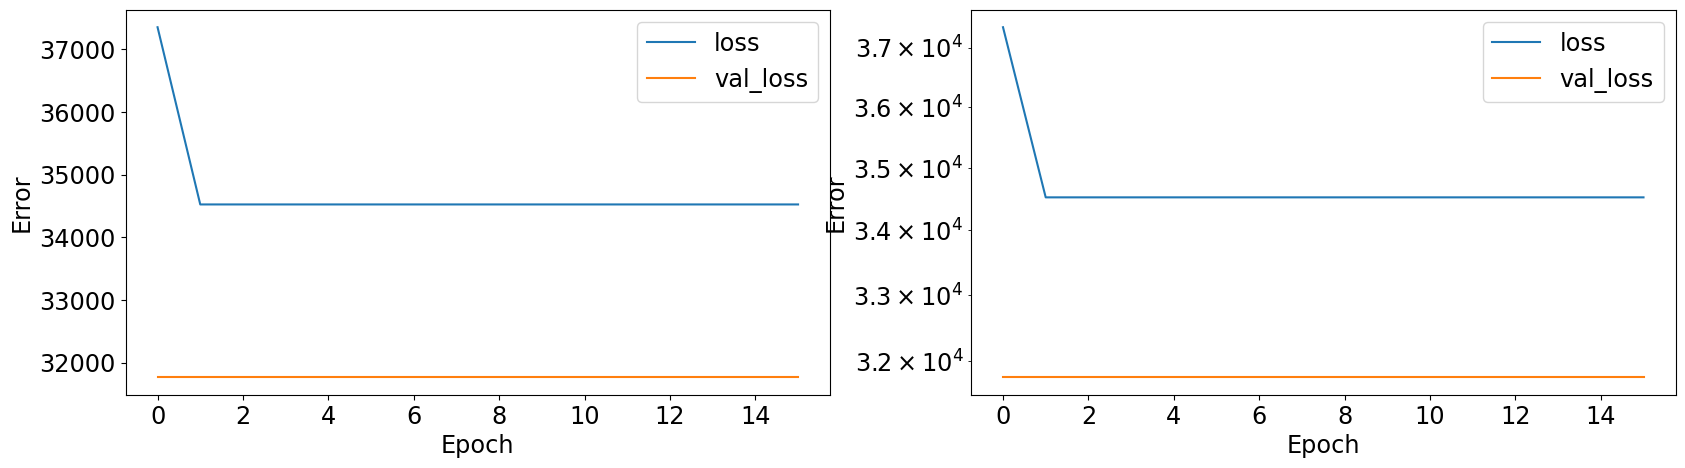

In [13]:
total_dataset = dataset_train.shuffle(buffor_size).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

importlib.reload(project);

model_fc = project.trainModel(model_fc, train_data=train_batches, val_data=val_batches, nEpochs=300)

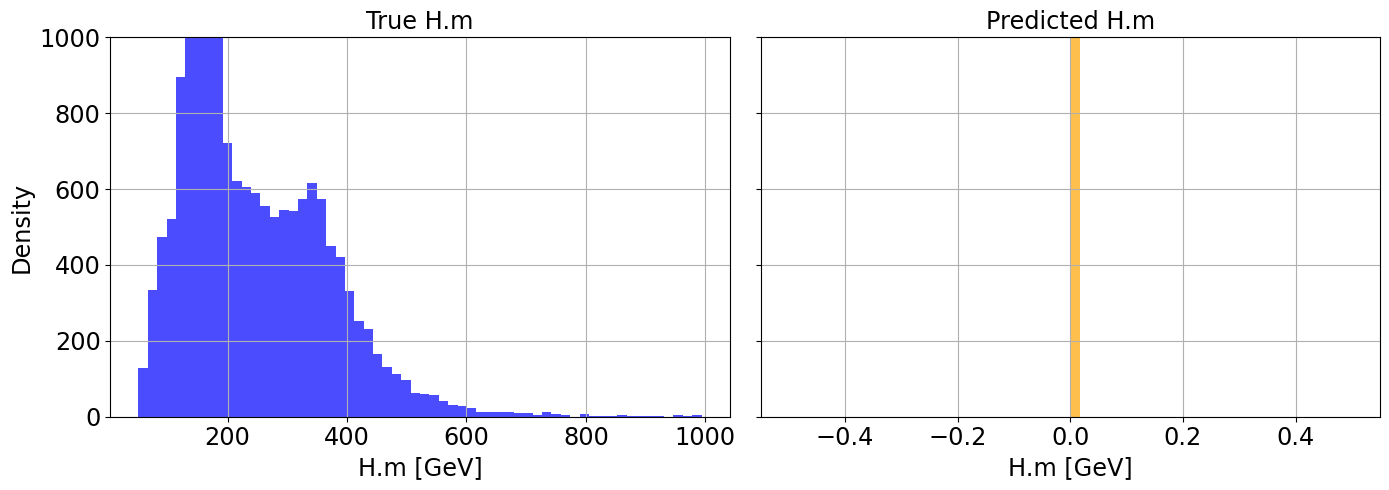

In [14]:
project.plot_H_mass(model_fc, val_batches)

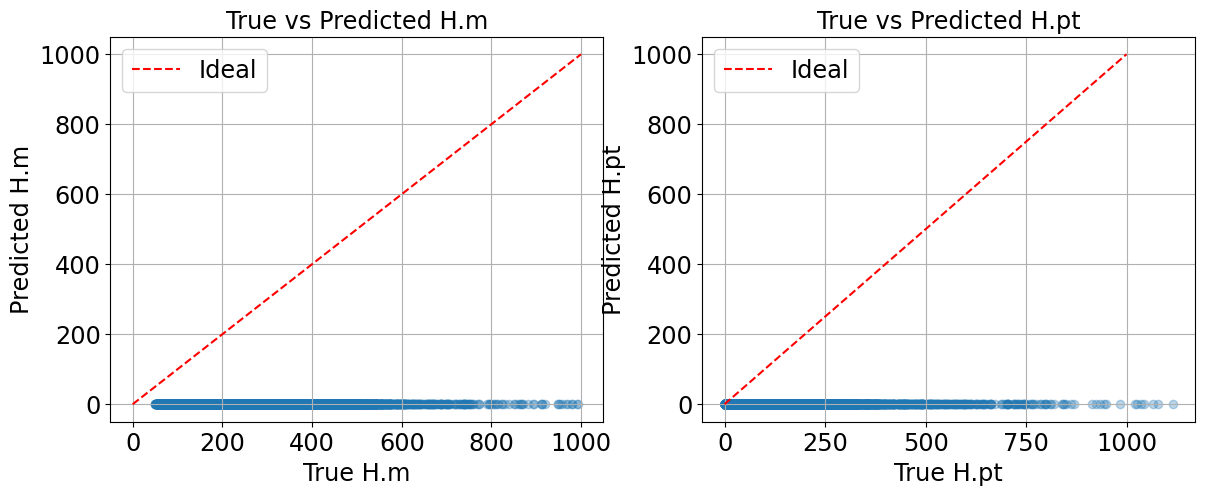

In [15]:
project.true_vs_predict_H_mass(model_fc, val_batches)

True Higgs mass:  176.95279  and predicted: 0.0


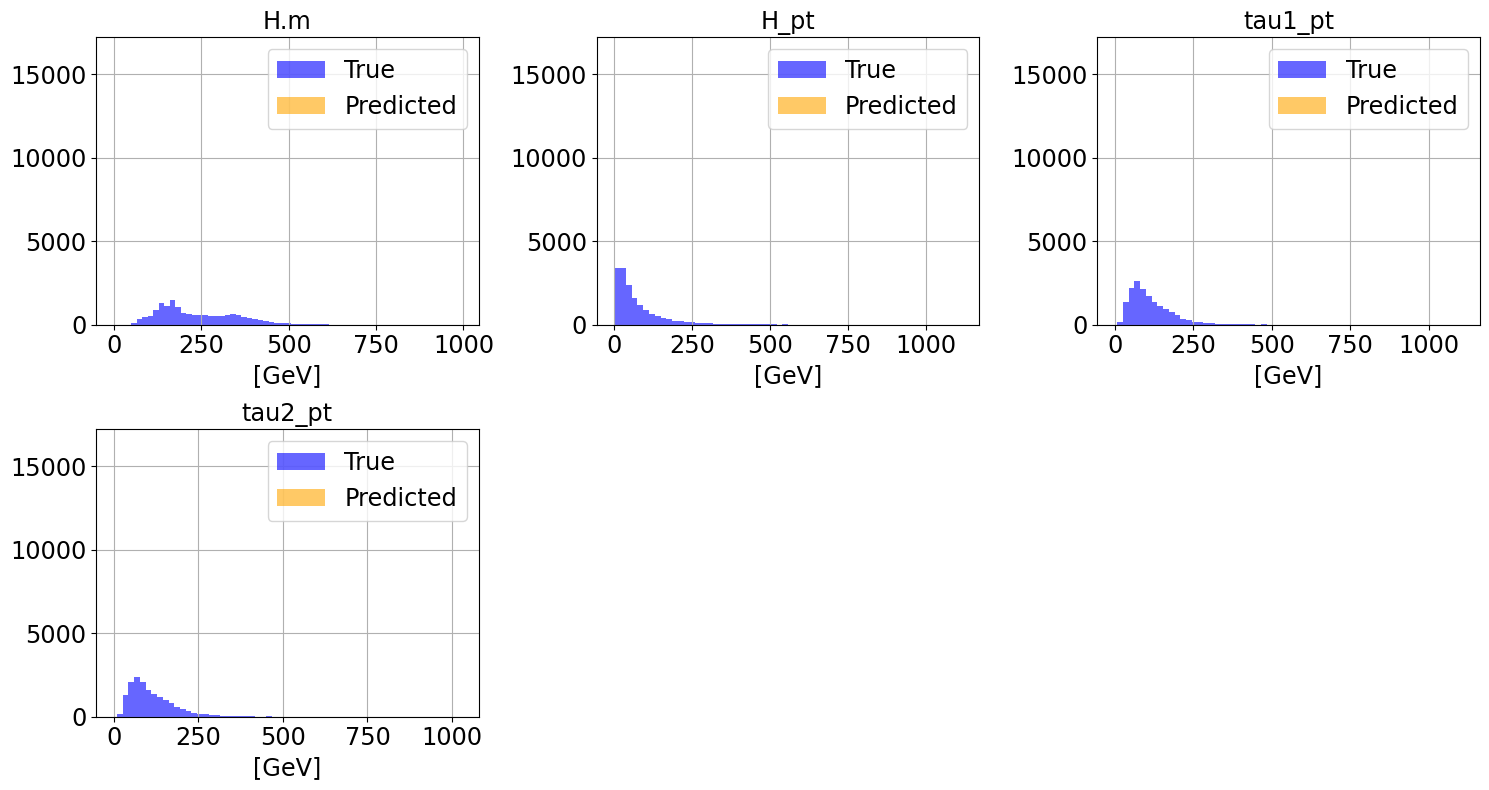

In [16]:
project.plot_all_labels(model_fc, val_batches, output_targets)

[H.m] sigma = 120.6823
[H_pt] sigma = 99.1688
[tau1_pt] sigma = 73.2590
[tau2_pt] sigma = 72.0762


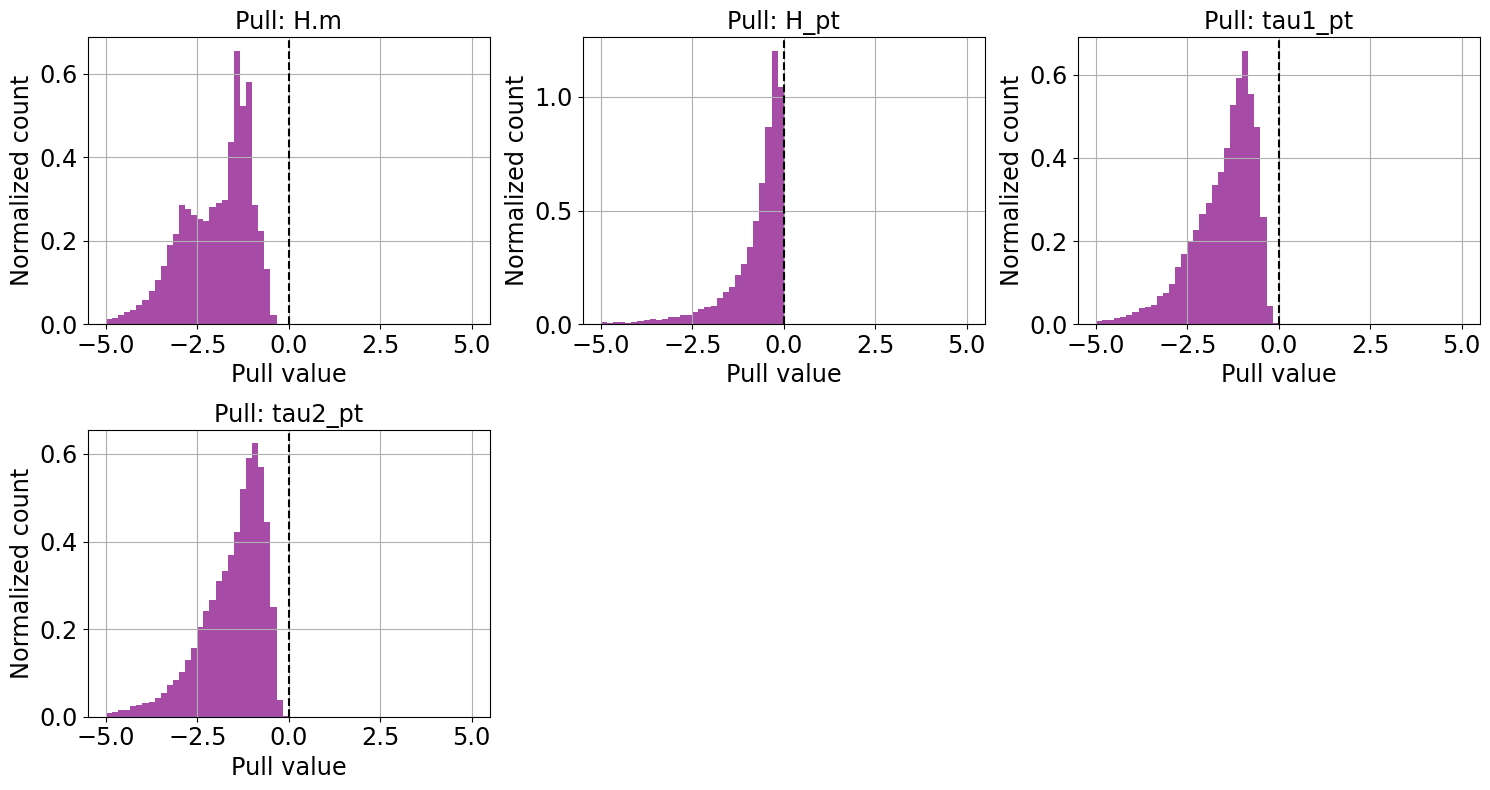

In [17]:
project.plot_all_pulls(model_fc, val_batches, output_targets)

## Model architektury dwugałęziowej

In [18]:
dataset_train_test = dataset_train.unbatch()
dataset_split = dataset_train_test.map(project.split_inputs).batch(batchSize).cache()

total_dataset = dataset_split.shuffle(buffor_size).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

In [19]:
input_particles = tf.keras.Input(shape=(10,), name="particles_input")
input_met = tf.keras.Input(shape=(5,), name="met_input")

# Gałąź cząstek
norm_particles = tf.keras.layers.Normalization()(input_particles)
x1 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles)
x1 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)
x1 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)
x1 = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)

# Gałąź MET
norm_met = tf.keras.layers.Normalization()(input_met)
x2 = tf.keras.layers.Dense(32, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_met)
x2 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)

# Połączenie
x = tf.keras.layers.concatenate([x1, x2])
x = tf.keras.layers.Dense(1024, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(output_shape, activation='linear', name='output')(x)

model_dual = tf.keras.Model(inputs={'particles_input': input_particles, 'met_input': input_met}, outputs=output)

model_dual.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ particles_input     │ (None, 10)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ met_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_1     │ (None, 10)        │         21 │ particles_input[… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 5)         │         11 │ met_input[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 64)        │        704 │ normalization_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │        192 │ normalization_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 128)       │      8,320 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      2,112 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 256)       │     33,024 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 128)       │      8,320 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 512)       │    131,584 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 256)       │     33,024 │ dense_14[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 768)       │          0 │ dense_11[0][0],   │
│ (Concatenate)       │                   │            │ dense_15[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 1024)      │    787,456 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 512)       │    524,800 │ dense_16[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 256)       │    131,328 │ dense_17[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 128)       │     32,896 │ dense_18[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 64)        │      8,256 │ dense_19[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 4)         │        260 │ dense_20[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,702,308 (6.49 MB)

 Trainable params: 1,702,276 (6.49 MB)

 Non-trainable params: 32 (136.00 B)

Epoch 1/300
    150/Unknown 11s 56ms/step - accuracy: 0.6884 - loss: 105968.3047

/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
E0000 00:00:1749807300.660189 19593749 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 60ms/step - accuracy: 0.6893 - loss: 105467.1484 - val_accuracy: 0.9126 - val_loss: 6165.6406
Epoch 2/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9041 - loss: 6932.3027 - val_accuracy: 0.8978 - val_loss: 5901.9609
Epoch 3/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 61ms/step - accuracy: 0.9160 - loss: 5719.1333 - val_accuracy: 0.9052 - val_loss: 5165.6968
Epoch 4/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9182 - loss: 5207.7417 - val_accuracy: 0.9065 - val_loss: 4982.8218
Epoch 5/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9181 - loss: 5008.7544 - val_accuracy: 0.9046 - val_loss: 4978.1943
Epoch 6/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - accuracy: 0.9197 - loss: 4929.1445 - val_accuracy: 0.8935 - val_loss: 5203.4004
Epoch 7/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9191 - loss: 4799.1045 - val_accuracy: 0.8886 - val_loss: 5232.5527
Epoch 8/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step - a

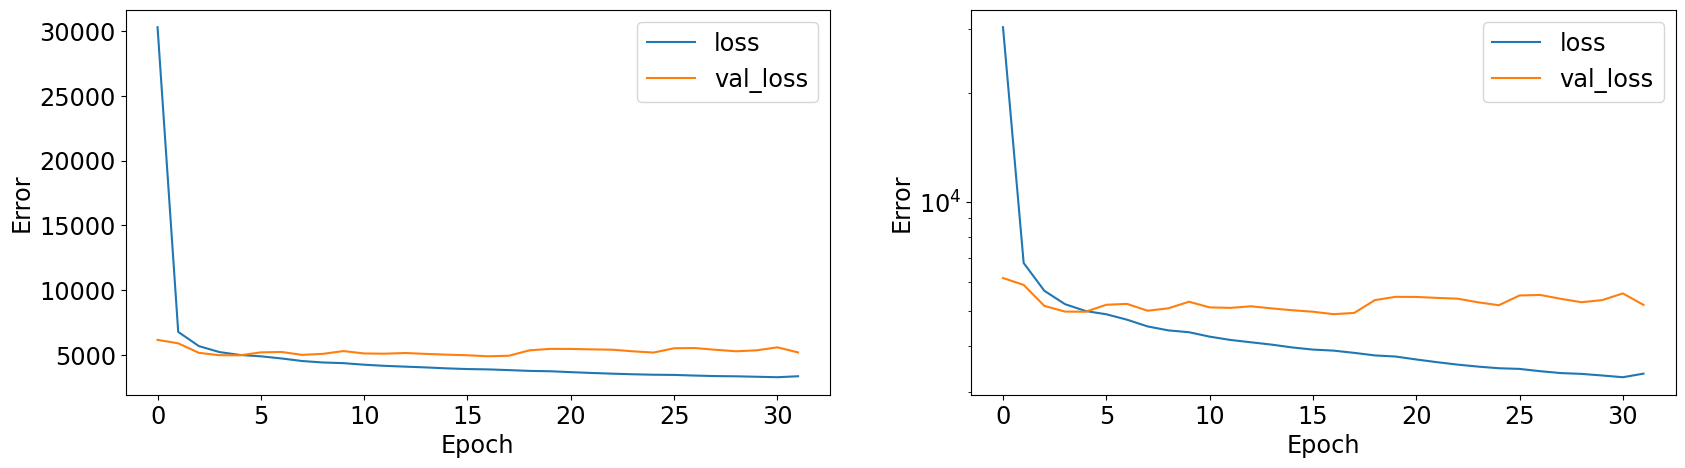

In [20]:
importlib.reload(project);

model_dual = project.trainModel(model_dual, train_data=train_batches, val_data=val_batches, nEpochs=300);

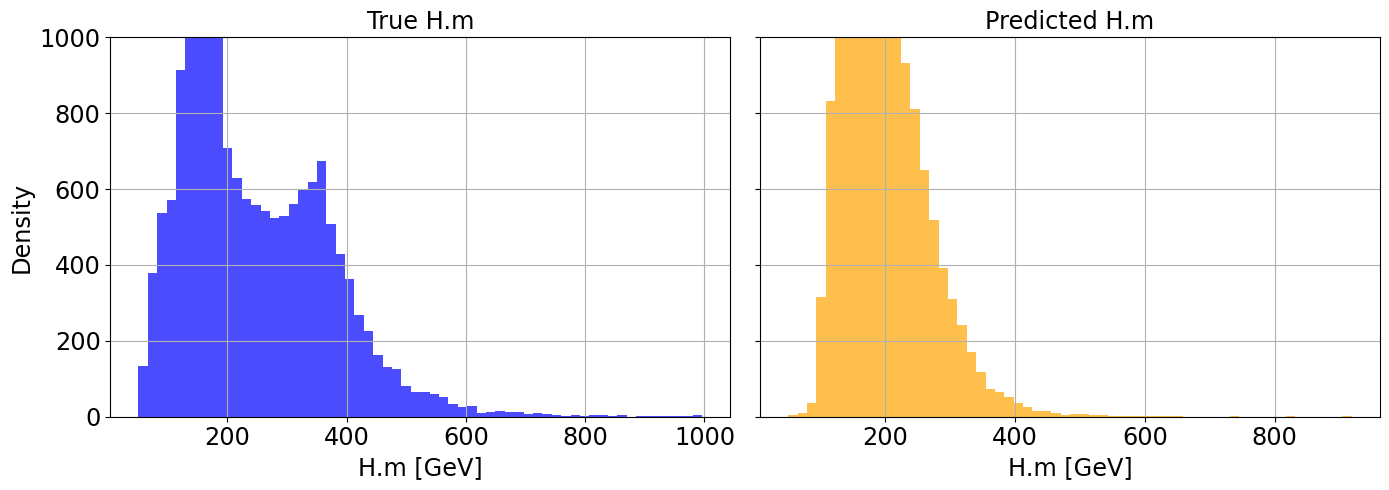

In [21]:
project.plot_H_mass(model_dual, val_batches)

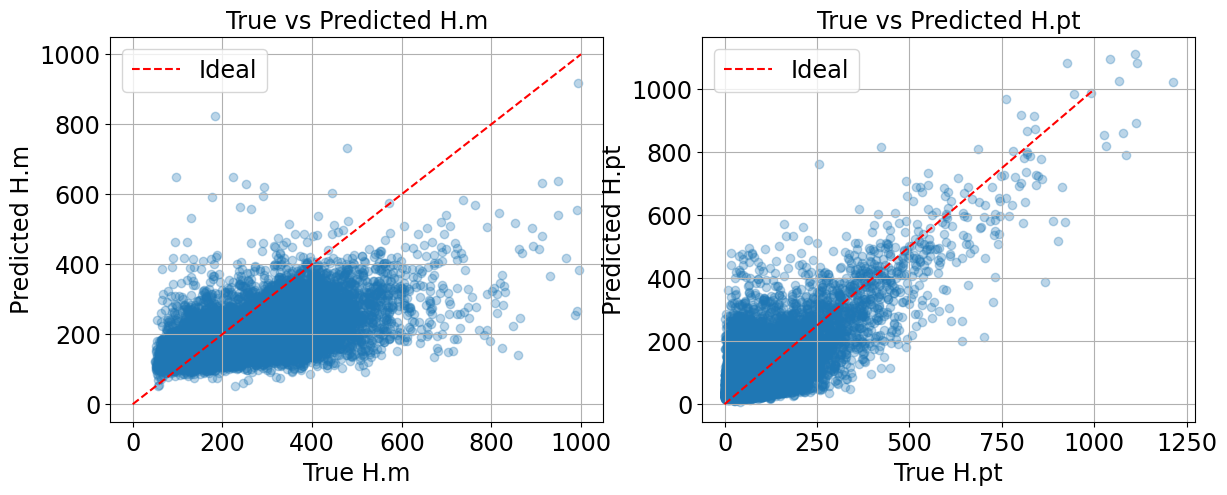

In [22]:
project.true_vs_predict_H_mass(model_dual, val_batches)

True Higgs mass:  167.32393  and predicted: 249.84213


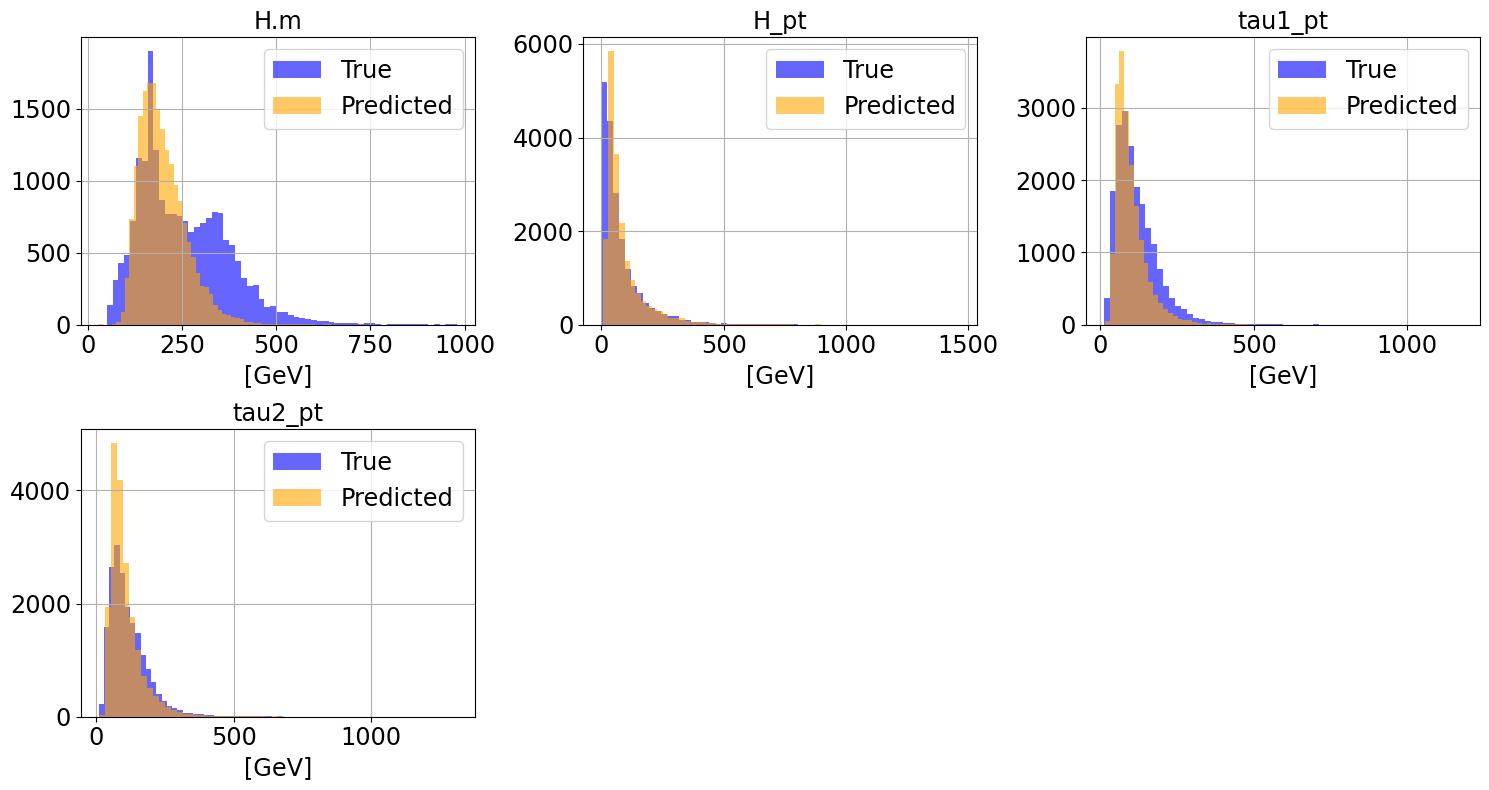

In [23]:
project.plot_all_labels(model_dual, train_batches, output_targets)
importlib.reload(project);

[H.m] sigma = 97.6339
[H_pt] sigma = 65.8283
[tau1_pt] sigma = 44.3692
[tau2_pt] sigma = 43.9282


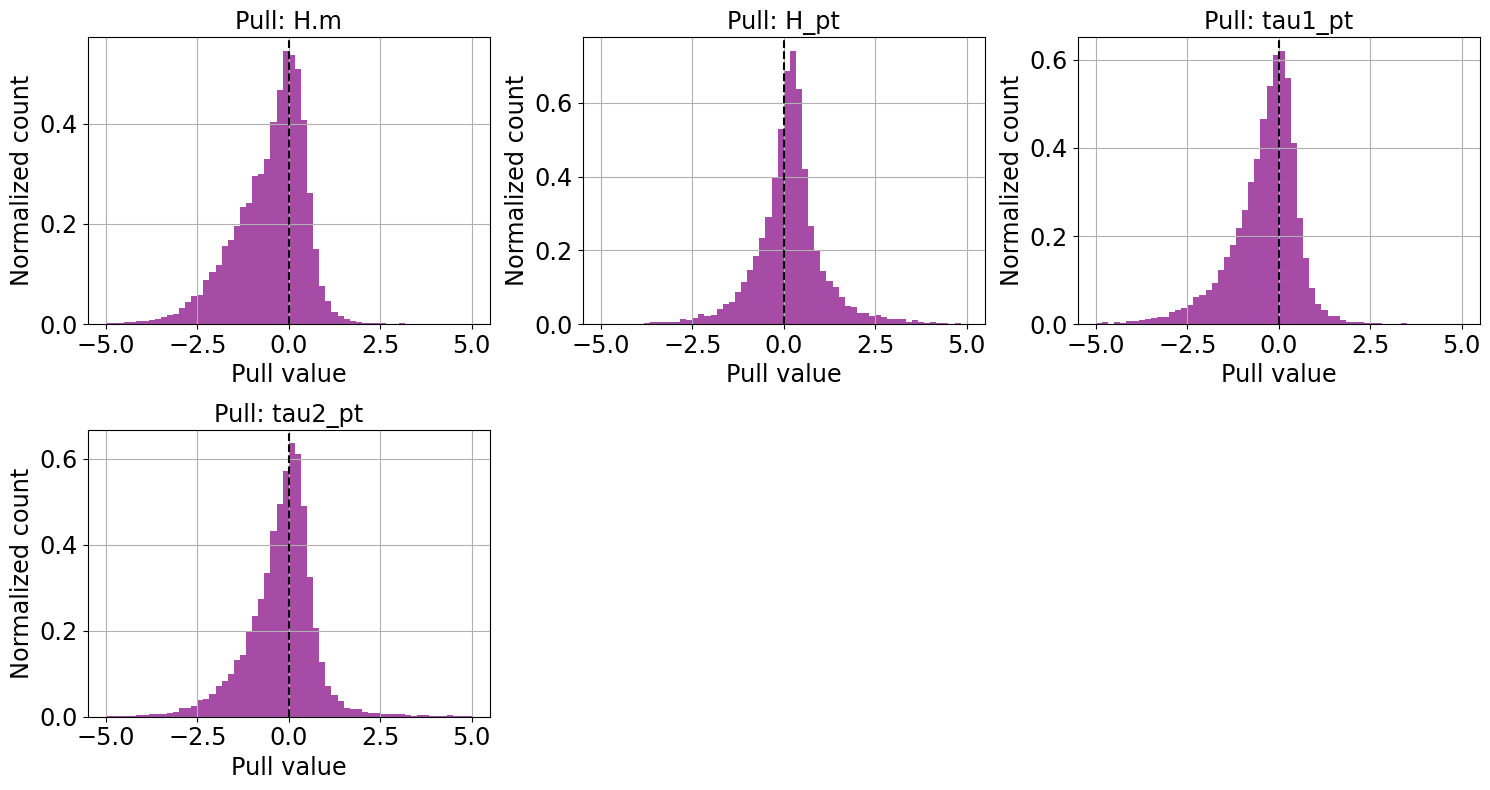

In [24]:
project.plot_all_pulls(model_dual, val_batches, output_targets)

## Model architektury trójgałęziowej

In [25]:
dataset_train_test = dataset_train.unbatch()
dataset_split2 = dataset_train_test.map(project.split_inputs2).batch(batchSize).cache()

total_dataset = dataset_split2.shuffle(buffor_size).cache()
val_batches = total_dataset.take(128)
train_batches = total_dataset.skip(128)

In [26]:
input_particles1 = tf.keras.Input(shape=(5,), name="particles_input1")
input_particles2 = tf.keras.Input(shape=(5,), name="particles_input2")
input_met = tf.keras.Input(shape=(5,), name="met_input")

# Gałąź cząstek - 1
norm_particles1 = tf.keras.layers.Normalization()(input_particles1)
x1 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles1)
x1 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)
x1 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x1)

# Gałąź cząstek - 2
norm_particles2 = tf.keras.layers.Normalization()(input_particles2)
x2 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_particles2)
x2 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)
x2 = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x2)


#Połączona gałąź cząstek
x12 = tf.keras.layers.concatenate([x1, x2])
x12 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x12)
x12 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x12)

# Gałąź MET
norm_met = tf.keras.layers.Normalization()(input_met)
x3 = tf.keras.layers.Dense(32, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(norm_met)
x3 = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x3)
x3 = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x3)

# Połączenie
x = tf.keras.layers.concatenate([x12, x3])
x = tf.keras.layers.Dense(512, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(256, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(128, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
x = tf.keras.layers.Dense(64, activation='relu',
                          bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                          kernel_initializer='he_normal')(x)
output = tf.keras.layers.Dense(output_shape, activation='linear', name='output')(x)

model_dual2 = tf.keras.Model(inputs={'particles_input1': input_particles1, 'particles_input2': input_particles2, 'met_input': input_met}, outputs=output)

model_dual2.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ particles_input1    │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ particles_input2    │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_3     │ (None, 5)         │         11 │ particles_input1… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_4     │ (None, 5)         │         11 │ particles_input2… │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 64)        │        384 │ normalization_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 64)        │        384 │ normalization_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 128)       │      8,320 │ dense_21[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 128)       │      8,320 │ dense_24[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ met_input           │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 256)       │     33,024 │ dense_22[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 256)       │     33,024 │ dense_25[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_5     │ (None, 5)         │         11 │ met_input[0][0]   │
│ (Normalization)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 512)       │          0 │ dense_23[0][0],   │
│ (Concatenate)       │                   │            │ dense_26[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 32)        │        192 │ normalization_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 128)       │     65,664 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 64)        │      2,112 │ dense_29[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 64)        │      8,256 │ dense_27[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 128)       │      8,320 │ dense_30[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 192)       │          0 │ dense_28[0][0],   │
│ (Concatenate)       │                   │            │ dense_31[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 512)       │     98,816 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 256)       │    131,328 │ dense_32[0][0]  

 Total params: 439,589 (1.68 MB)

 Trainable params: 439,556 (1.68 MB)

 Non-trainable params: 33 (144.00 B)

Epoch 1/300


E0000 00:00:1749807570.960037 19593749 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


150/150 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.6850 - loss: 72799.3984 - val_accuracy: 0.9186 - val_loss: 6131.2104
Epoch 2/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.8809 - loss: 6560.7583 - val_accuracy: 0.9171 - val_loss: 5739.5215
Epoch 3/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - accuracy: 0.8945 - loss: 5832.7812 - val_accuracy: 0.9174 - val_loss: 5691.8076
Epoch 4/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 53ms/step - accuracy: 0.9000 - loss: 5345.9883 - val_accuracy: 0.9171 - val_loss: 5662.1948
Epoch 5/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - accuracy: 0.9046 - loss: 5003.4971 - val_accuracy: 0.9175 - val_loss: 4966.7729
Epoch 6/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 51ms/step - accuracy: 0.9055 - loss: 4760.6504 - val_accuracy: 0.9189 - val_loss: 4567.8599
Epoch 7/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.9062 - loss: 4600.2856 - val_accuracy: 0.9191 - val_loss: 4505.3730
Epoch 8/300
150/150 ━━━━━━━━━━━━━━━━━━━━ 8s 54ms/step - ac

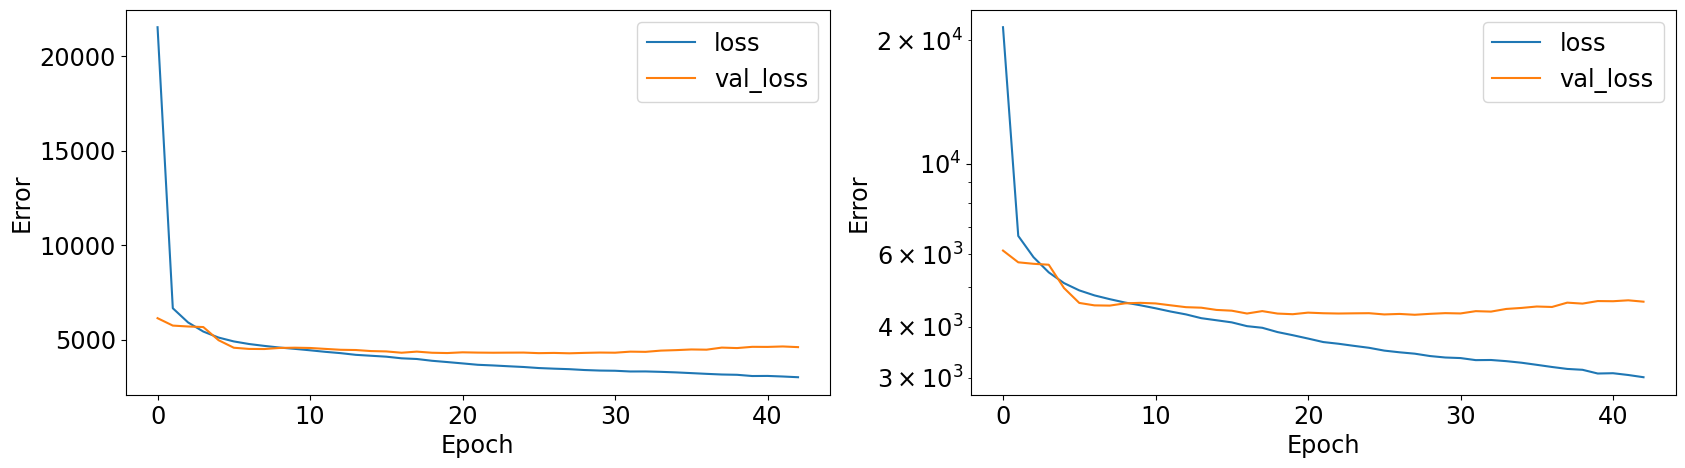

In [27]:
importlib.reload(project);

model_dual2 = project.trainModel(model_dual2, train_data=train_batches, val_data=val_batches, nEpochs=300);

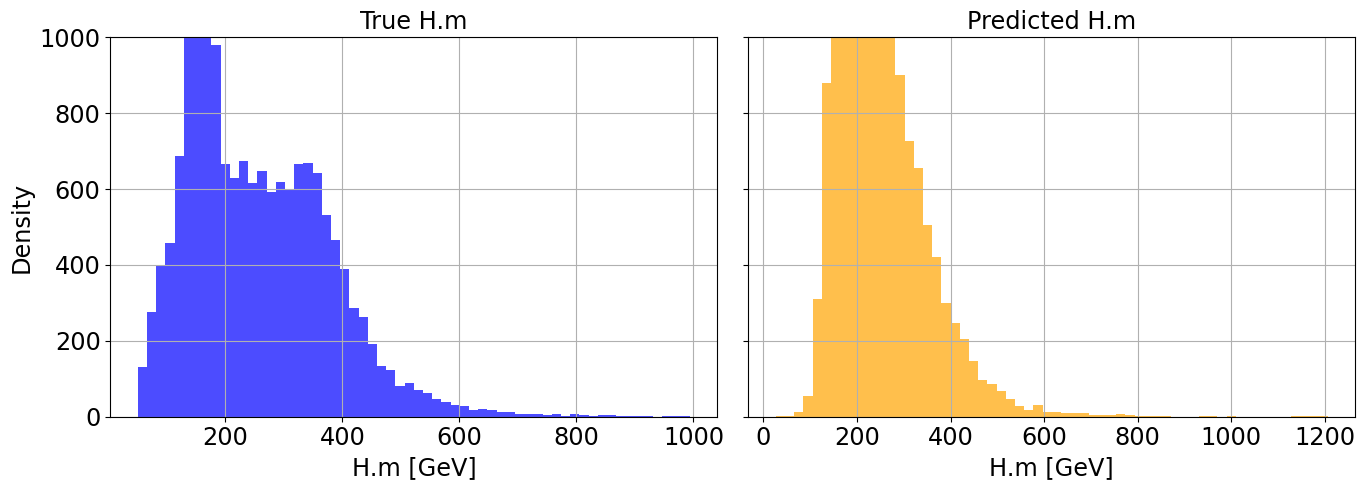

In [28]:
importlib.reload(project);

project.plot_H_mass(model_dual2, val_batches)

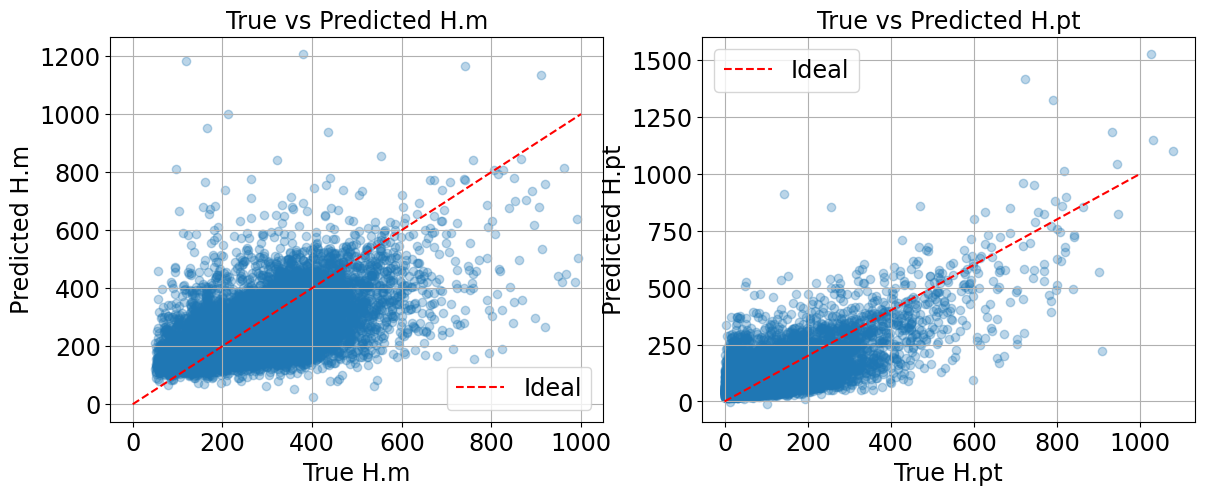

In [29]:
project.true_vs_predict_H_mass(model_dual2, val_batches)

True Higgs mass:  243.21017  and predicted: 239.96497


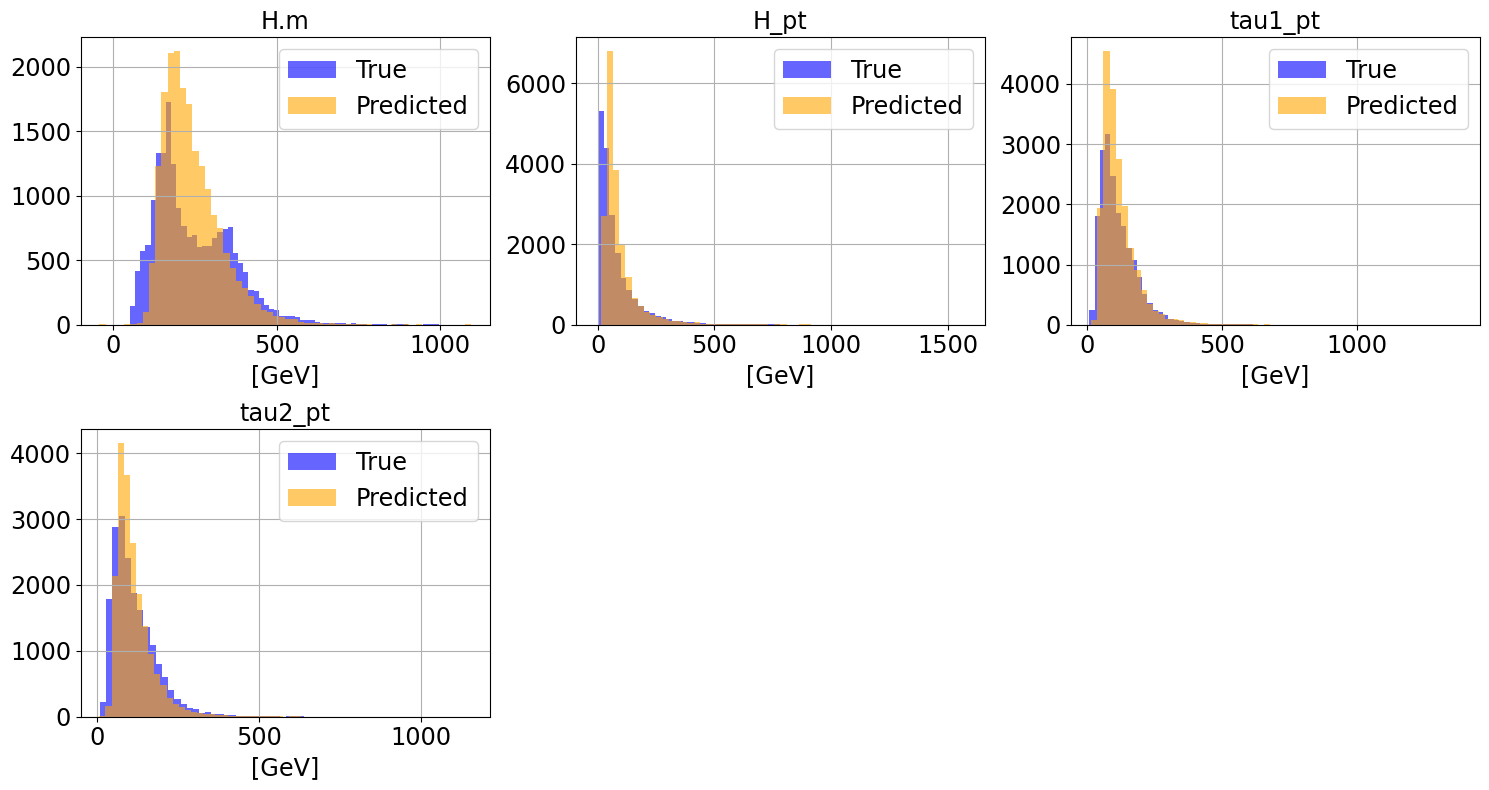

In [30]:
project.plot_all_labels(model_dual2, train_batches, output_targets)

[H.m] sigma = 98.0909
[H_pt] sigma = 67.0508
[tau1_pt] sigma = 45.0975
[tau2_pt] sigma = 44.8135


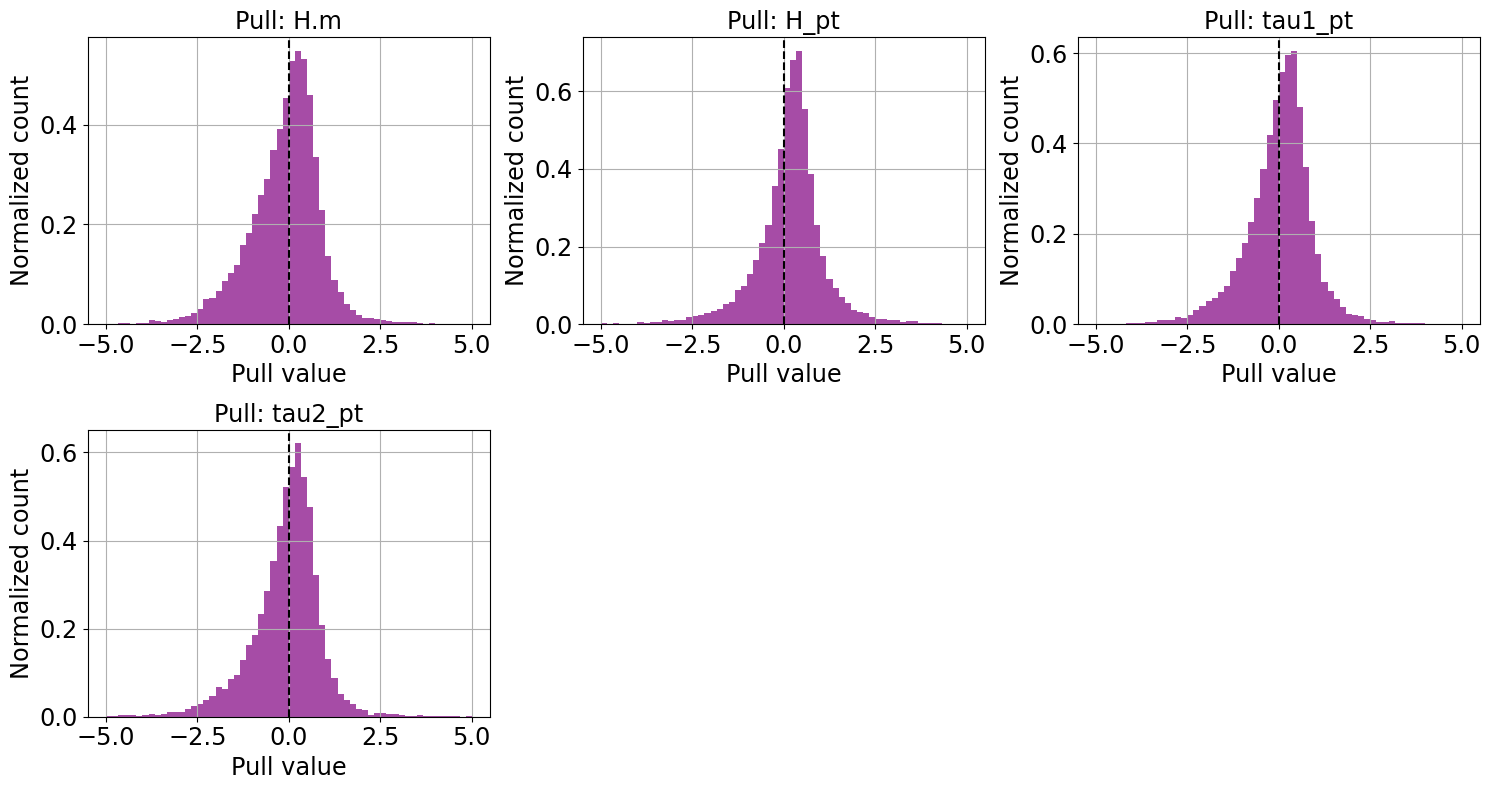

In [31]:
project.plot_all_pulls(model_dual2, val_batches, output_targets)